In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pyts.image import GASF, GADF
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense
from keras.utils import to_categorical
from sklearn.model_selection import TimeSeriesSplit
import datetime

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K


Using TensorFlow backend.


In [2]:
stockFileNames=os.listdir('./Stocks/')

In [3]:
stockSymbol=[]
col_names=['Date','Open','High','Low','Close','Volume','c']
dataList=list()
for f in stockFileNames:
    symbol=[str.upper(f.split('.')[0])]
    fileName='./Stocks/'+f
    fp=open(fileName,'r')
    if len(fp.read())>0:
        data=np.array(pd.read_csv(fileName,header=None))
        for d in data[1:]:
            dataList.append(d)
            stockSymbol.append(symbol)
        
    fp.close()
print('DONE!!')

DONE!!


In [4]:
np.shape(dataList),np.shape(stockSymbol)

((14887665, 7), (14887665, 1))

In [5]:
df1=pd.DataFrame(dataList,columns=col_names)
df2=pd.DataFrame(stockSymbol,columns=['SYMBOL'])

In [6]:
AllSymbolList=np.unique(df2)
df=pd.concat([df1,df2],axis=1)
df.head(5)
df['Date'][:10]

0    2017-01-03
1    2017-01-04
2    2017-01-05
3    2017-01-06
4    2017-01-09
5    2017-01-10
6    2017-01-11
7    2017-01-12
8    2017-01-13
9    2017-01-17
Name: Date, dtype: object

In [7]:
allCloseDF=df[['Date','Close','SYMBOL']]
allCloseDF.head(5)

,Date,Close,SYMBOL
0,2017-01-03,24.692,OUSM
1,2017-01-04,25.026,OUSM
2,2017-01-05,24.849,OUSM
3,2017-01-06,24.781,OUSM
4,2017-01-09,24.572,OUSM


In [8]:
def getCloseDataFromSymbols(df,symbol_list):
    return df[df['SYMBOL'].isin(symbol_list)][['Date','Close']]

resultDF=getCloseDataFromSymbols(allCloseDF,['AMZN','FB','GOOGL','NFLX'])
print(resultDF)

               Date    Close
1862066  2005-02-25     1.57
1862067  2005-02-28   1.5286
1862068  2005-03-01   1.5414
1862069  2005-03-02   1.5257
1862070  2005-03-03   1.5086
1862071  2005-03-04   1.5286
1862072  2005-03-07   1.5129
1862073  2005-03-08   1.4457
1862074  2005-03-09     1.43
1862075  2005-03-10   1.4129
1862076  2005-03-11   1.3471
1862077  2005-03-14   1.3571
1862078  2005-03-15   1.3143
1862079  2005-03-16     1.31
1862080  2005-03-17   1.3143
1862081  2005-03-18   1.3143
1862082  2005-03-21     1.33
1862083  2005-03-22   1.3071
1862084  2005-03-23   1.3129
1862085  2005-03-24     1.29
1862086  2005-03-28   1.3971
1862087  2005-03-29   1.4429
1862088  2005-03-30   1.4643
1862089  2005-03-31     1.55
1862090  2005-04-01   1.5471
1862091  2005-04-04   1.5657
1862092  2005-04-05   1.5457
1862093  2005-04-06   1.5857
1862094  2005-04-07   1.6057
1862095  2005-04-08   1.7157
...             ...      ...
9092305  2017-10-02   967.47
9092306  2017-10-03   972.08
9092307  2017-

In [9]:
AllSymbolList=np.unique(df2)
df=pd.concat([df1,df2],axis=1)
df.head(5)

,Date,Open,High,Low,Close,Volume,c,SYMBOL
0,2017-01-03,24.88,24.88,24.568,24.692,12957,0,OUSM
1,2017-01-04,24.732,25.944,24.732,25.026,10840,0,OUSM
2,2017-01-05,25.874,25.874,24.8,24.849,13104,0,OUSM
3,2017-01-06,24.82,24.858,24.771,24.781,2069,0,OUSM
4,2017-01-09,24.79,24.79,24.572,24.572,17870,0,OUSM


In [10]:
from sklearn.preprocessing import MinMaxScaler
from random import shuffle
scaler = MinMaxScaler(feature_range=(0, 1))

def getPastSequenceData(df,window):
    #df=np.array(df)
    X=[]
    y=[]
    print (df)
    p = scaler.fit_transform(np.array(df['Close']).reshape(-1,1)) 
    #shuffle(p)
    for i in range(1,len(df)-window,window):
        #print(df[i-1:i+window-1],df[i+window-1])
        date=df['Date'].iloc[i]
        date=date.replace('-','')
        #print(date)
        date=np.array(date)
        vals=np.array(p[i-1:i+window-1])
        temp=vals
        X.append(temp)
        y.append(p[i+window-1])
    return X,y

In [11]:
#resultDF = scaler.fit_transform(resultDF)
print (resultDF.shape)

X,y=getPastSequenceData(resultDF,8)
X=np.array(X)

X=X.reshape(X.shape[0],X.shape[1],1)
y=np.array(y)
np.shape(X),np.shape(y)


(13068, 2)
               Date    Close
1862066  2005-02-25     1.57
1862067  2005-02-28   1.5286
1862068  2005-03-01   1.5414
1862069  2005-03-02   1.5257
1862070  2005-03-03   1.5086
1862071  2005-03-04   1.5286
1862072  2005-03-07   1.5129
1862073  2005-03-08   1.4457
1862074  2005-03-09     1.43
1862075  2005-03-10   1.4129
1862076  2005-03-11   1.3471
1862077  2005-03-14   1.3571
1862078  2005-03-15   1.3143
1862079  2005-03-16     1.31
1862080  2005-03-17   1.3143
1862081  2005-03-18   1.3143
1862082  2005-03-21     1.33
1862083  2005-03-22   1.3071
1862084  2005-03-23   1.3129
1862085  2005-03-24     1.29
1862086  2005-03-28   1.3971
1862087  2005-03-29   1.4429
1862088  2005-03-30   1.4643
1862089  2005-03-31     1.55
1862090  2005-04-01   1.5471
1862091  2005-04-04   1.5657
1862092  2005-04-05   1.5457
1862093  2005-04-06   1.5857
1862094  2005-04-07   1.6057
1862095  2005-04-08   1.7157
...             ...      ...
9092305  2017-10-02   967.47
9092306  2017-10-03   972.08
909

/home/karimmady/.local/lib/python2.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


((1633, 8, 1), (1633, 1))

In [12]:
from sklearn.preprocessing import MinMaxScaler
tsSplit=TimeSeriesSplit(n_splits=5)


for train_index,test_index in tsSplit.split(X):
    X_train, X_test = X[:len(train_index)], X[len(train_index): (len(train_index)+len(test_index))]
    y_train, y_test = y[:len(train_index)], y[len(train_index): (len(train_index)+len(test_index))]


print (y_train)
print(X_train.shape)

[[1.23719722e-04]
 [3.53484919e-05]
 [2.27202432e-04]
 ...
 [1.49815746e-01]
 [1.27387128e-01]
 [1.44646029e-01]]
(1361, 8, 1)


In [13]:
from keras.layers import Conv1D, Activation,MaxPooling1D,Flatten, GRU, AveragePooling1D

model=Sequential()
model.add(Conv1D(32, 3, padding='same', input_shape =X_train.shape[1:]))
model.add(Activation('elu'))
model.add(Conv1D(32, 3, padding='same'))
model.add(Activation('elu'))
model.add(AveragePooling1D(pool_size=2))
model.add(Conv1D(64, 3, padding='same', input_shape =X_train.shape[1:]))
model.add(Activation('elu'))
model.add(Conv1D(64, 3, padding='same'))
model.add(Activation('elu'))
model.add(AveragePooling1D(pool_size=3))
#model.add(GRU(200,input_shape=(8,1),return_sequences=True))
#model.add(GRU(256))
model.add(Flatten())
model.add(Dense(1))

model.compile(loss='mse', optimizer='rmsprop', batch_size=1)

model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 8, 32)             128       
_________________________________________________________________
activation_1 (Activation)    (None, 8, 32)             0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 8, 32)             3104      
_________________________________________________________________
activation_2 (Activation)    (None, 8, 32)             0         
_________________________________________________________________
average_pooling1d_1 (Average (None, 4, 32)             0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 4, 64)             6208      
_________________________________________________________________
activation_3 (Activation)    (None, 4, 64)             0         
__________

In [14]:
model.compile(loss='mse',optimizer='adam',metrics=['acc'])
model.fit(X_train,y_train,epochs=300, batch_size = 1024,verbose=1)


Epoch 1/300
1361/1361 [==============================] - 1s 678us/step - loss: 0.0289 - acc: 0.0000e+00
Epoch 2/300
1361/1361 [==============================] - 0s 7us/step - loss: 0.0042 - acc: 0.0000e+00
Epoch 3/300
1361/1361 [==============================] - 0s 7us/step - loss: 0.0086 - acc: 0.0000e+00
Epoch 4/300
1361/1361 [==============================] - 0s 7us/step - loss: 0.0046 - acc: 0.0000e+00
Epoch 5/300
1361/1361 [==============================] - 0s 7us/step - loss: 9.2963e-04 - acc: 0.0000e+00
Epoch 6/300
1361/1361 [==============================] - 0s 6us/step - loss: 

In [15]:
import math
from sklearn.metrics import mean_squared_error

# make predictions
trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)


# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform(y_train)
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform(y_test)
#print(testPredict[400:],'\n\n\n\n',testY[400:])


Average Training Difference: 4.63 
Average Testing Difference: 8.61 


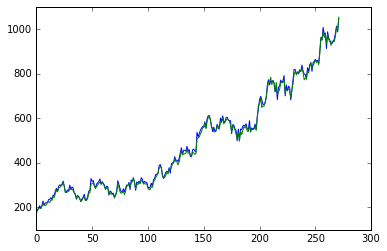

In [16]:

trainScore=0
testScore=0
# calculate root mean squared error
for i in range (trainY.shape[0]):
    trainScore += math.sqrt(mean_squared_error(trainY[i], trainPredict[i]))
trainScore=trainScore/trainY.shape[0]

for i in range (testY.shape[0]):
    testScore += math.sqrt(mean_squared_error(testY[i],testPredict[i]))
testScore=testScore/testY.shape[0]

print('Average Training Difference: %.2f ' % (trainScore))
print('Average Testing Difference: %.2f ' % (testScore))
# for i in range(testPredict.shape[0]):
#     if testPredict[i] > 1000:
#         print testPredict[i]
plt.plot(testPredict)

plt.plot(testY)
plt.show()
